In [12]:
import base64
from io import BytesIO
import pathlib
import pandas as pd

from flask import Flask
from matplotlib.figure import Figure

import numpy as np
from matplotlib.collections import LineCollection

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

ModuleNotFoundError: No module named '_tkinter'

In [7]:
data = pd.read_csv("/Users/roeemazor/PycharmProjects/turbo-guacamole/data/skiing/HY_200114/run1/pod01_raw.csv")


In [5]:
a.keys()

Index(['time[ISO-UTC]', 'xPos[m]', 'yPos[m]', 'Latitude[deg]',
       'Longitude[deg]', 'speed_2D[km/h]', 'speed_3D[km/h]', 'prs[Pa]',
       'alt_baro[m]', 'alt_gps[m]', 'hr[bpm]'],
      dtype='object')

In [6]:
np.gradient(a['speed_3D[km/h]'])

array([ 2.5 ,  1.55,  0.85,  1.15,  1.1 ,  0.15,  0.2 ,  1.8 ,  3.55,
        2.9 ,  1.75,  1.65,  1.55,  2.05,  2.95,  2.7 ,  1.1 ,  0.35,
        0.25,  1.45,  2.3 ,  1.75,  1.1 ,  0.3 ,  0.45,  1.2 ,  0.75,
        0.4 ,  1.15,  1.25,  0.5 ,  0.6 ,  1.6 ,  1.3 ,  0.2 ,  0.25,
        0.1 , -0.05,  0.4 ,  0.65, -0.15, -0.15,  0.2 ,  0.6 ,  0.4 ,
        0.45,  0.95,  0.1 ,  0.  ,  0.55,  0.55,  0.9 ,  1.4 ,  1.05,
        0.6 , -0.45, -0.65,  0.05, -0.05, -0.75, -1.5 ,  0.25,  1.35,
        1.25,  1.35,  1.2 ,  0.85, -0.4 , -0.25,  0.75,  0.55,  0.3 ,
        0.75,  0.2 , -0.55, -0.25,  0.1 ,  0.1 ,  0.1 ,  0.15,  0.65,
        0.65,  0.4 ,  0.75,  0.9 ,  1.  ,  0.8 ,  0.05, -0.25,  0.4 ,
        0.5 ,  0.15,  0.95,  0.05,  0.2 ,  0.75,  0.2 ,  1.3 ,  1.45,
        0.2 ,  0.1 ,  0.3 ,  0.  ,  0.15, -0.05,  0.15, -0.45, -1.25,
       -0.45,  0.4 ,  0.5 ,  0.9 ,  0.6 ,  0.35,  0.15,  0.4 ,  0.6 ,
        0.25,  0.2 , -0.85, -0.6 ,  0.  , -0.65, -0.1 ,  0.55,  0.15,
        0.2 ,  0.05,

/var/folders/m2/g230ylz95832f9sr1nz5rn680000gp/T/ipykernel_16023/3258722939.py:58: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


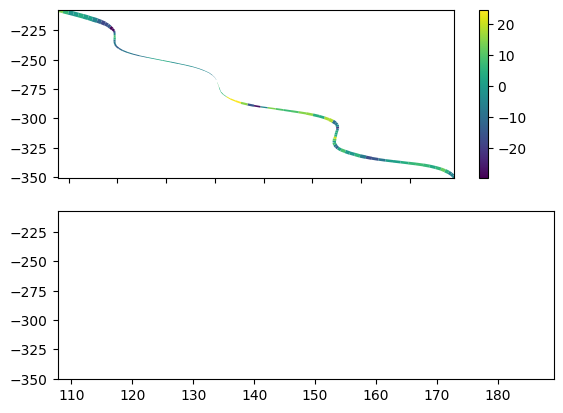

In [106]:
speed_array_len = data['speed_3D[km/h]'].count()
t = np.arange(0, 0 + (0.1 * speed_array_len) , 0.1)
x = data['xPos[m]'] if 'xPos[m]' in data else data['Latitude[deg]']
y = data['yPos[m]'] if 'yPos[m]' in data else data['Longitude[deg]']

speed = data['speed_3D[km/h]']

x = x[200:300]
y = y[200:300]
speed = speed[200:300]
t = t[200:300]
acc = np.gradient(speed) * 10 # 10 hz sampling
#speed = ((speed - min(speed))/5)
speed = np.log10(speed/max(speed)) * 20

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

#speed = np.full((637,), 10)

#fig = Figure()
fig = plt.figure()
axs = fig.subplots(2, 1, sharex=True, sharey=True)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(acc.min(), acc.max())
lc = LineCollection(segments, cmap='viridis', norm=norm, linewidths=speed)
# Set the values used for colormapping
lc.set_array(acc)
#lc.set_linewidth(2) # dynamic width
line = axs[0].add_collection(lc)
fig.colorbar(line, ax=axs[0])

'''
# Use a boundary norm instead
cmap = ListedColormap(['r', 'g', 'b'])
norm = BoundaryNorm([-1, -0.5, 0.5, 1], cmap.N)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[1].add_collection(lc)
fig.colorbar(line, ax=axs[1])
'''

axs[0].set_xlim(x.min(), x.max())
axs[0].set_ylim(y.min(), y.max())

'''
# Save it to a temporary buffer.
buf = BytesIO()
fig.savefig(buf, format="png")
# Embed the result in the html output.
data = base64.b64encode(buf.getbuffer()).decode("ascii")
return f"<img src='data:image/png;base64,{data}'/>"
'''

fig.savefig("a.png", format="png")
fig.show()

In [67]:
speed.shape

(638,)

In [15]:
y

0     -610.400018
1     -610.199871
2     -610.021935
3     -609.799527
4     -609.566009
          ...    
633    357.638789
634    359.028758
635    360.296410
636    361.497347
637    362.598198
Name: yPos[m], Length: 638, dtype: float64

In [16]:
segments

array([[[ 324.231214, -610.400018],
        [ 324.094269, -610.199871]],

       [[ 324.094269, -610.199871],
        [ 324.018172, -610.021935]],

       [[ 324.018172, -610.021935],
        [ 323.919255, -609.799527]],

       ...,

       [[-180.125296,  359.028758],
        [-180.459926,  360.29641 ]],

       [[-180.459926,  360.29641 ],
        [-180.764134,  361.497347]],

       [[-180.764134,  361.497347],
        [-181.083554,  362.598198]]])

In [35]:
speed

0       3.5
1       6.0
2       6.6
3       7.7
4       8.9
       ... 
633    53.2
634    52.0
635    49.5
636    47.3
637    44.7
Name: speed_3D[km/h], Length: 638, dtype: float64

In [44]:
max(speed)


90.9

In [54]:
segments

array([[[ 324.231214, -610.400018],
        [ 324.094269, -610.199871]],

       [[ 324.094269, -610.199871],
        [ 324.018172, -610.021935]],

       [[ 324.018172, -610.021935],
        [ 323.919255, -609.799527]],

       ...,

       [[-180.125296,  359.028758],
        [-180.459926,  360.29641 ]],

       [[-180.459926,  360.29641 ],
        [-180.764134,  361.497347]],

       [[-180.764134,  361.497347],
        [-181.083554,  362.598198]]])

In [76]:
from scipy.interpolate import splev, splrep
y

0     -610.400018
1     -610.199871
2     -610.021935
3     -609.799527
4     -609.566009
          ...    
633    357.638789
634    359.028758
635    360.296410
636    361.497347
637    362.598198
Name: yPos[m], Length: 638, dtype: float64

In [73]:
spl = splrep(x, y)
x2 = np.linspace(0, 4*np.pi, 3000)
y2 = splev(x2, spl)

fig,a = plt.subplots(1, 2, figsize=(20,8))
for i, xy in enumerate([(x, y), (x2, y2)]):
    x3, y3 = xy
    lwidths=1+x3[:-1]
    points = np.array([x3, y3]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, linewidths=lwidths,color='blue')
    a[i].add_collection(lc)
    a[i].set_xlim(0,4*np.pi)
    a[i].set_ylim(-1.1,1.1)

ValueError: Error on input data

In [77]:
splrep(x, y)

ValueError: Error on input data